D:\Users\ouyangqq\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
D:\Users\ouyangqq\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


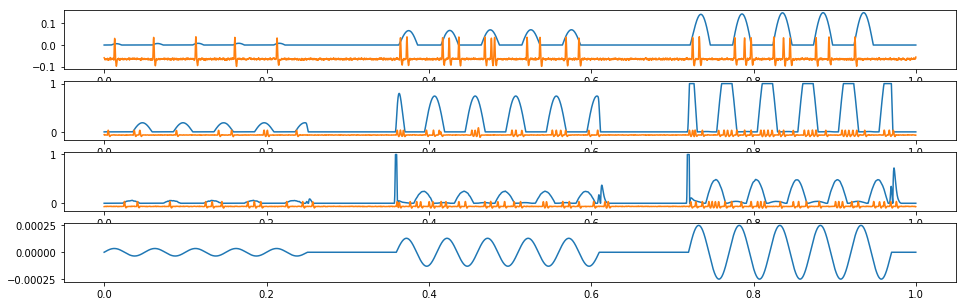

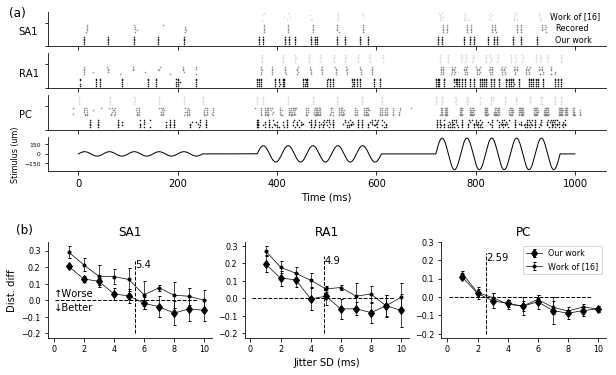

In [2]:
#frequency reponse
import pyspike as spk
from sys import path
import Receptors as receptorlib
path.append(r'..//common/') 
import ultils as alt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio  
import mat4py

condition=[1,2,3,4,5]

data_s_SA1=np.loadtxt('data/tspike_SA1.txt')
data_s_RA1=np.loadtxt('data/tspike_RA1.txt')
data_s_PC=np.loadtxt('data/tspike_PC.txt')
data_s_SA1_avg=np.zeros([20,2])
data_s_RA1_avg=np.zeros([20,2])
data_s_PC_avg=np.zeros([19,2])
for i in range(20):
    data_s_SA1_avg[i,0]=np.average([data_s_SA1[i+0,0],data_s_SA1[i+20,0],data_s_SA1[i+40,0],data_s_SA1[i+60,0],data_s_SA1[i+80,0]])
    data_s_SA1_avg[i,1]=np.average([data_s_SA1[i+0,1],data_s_SA1[i+20,1],data_s_SA1[i+40,1],data_s_SA1[i+60,1],data_s_SA1[i+80,1]])
for i in range(20):
    data_s_RA1_avg[i,0]=np.average([data_s_RA1[i+0,0],data_s_RA1[i+20,0],data_s_RA1[i+40,0],data_s_RA1[i+60,0],data_s_RA1[i+80,0]])
    data_s_RA1_avg[i,1]=np.average([data_s_RA1[i+0,1],data_s_RA1[i+20,1],data_s_RA1[i+40,1],data_s_RA1[i+60,1],data_s_RA1[i+80,1]])
space=19
for i in range(19):
    data_s_PC_avg[i,0]=np.average([data_s_PC[i+0,0],data_s_PC[i+space,0],data_s_PC[i+space*2,0],data_s_PC[i+space*3,0],data_s_PC[i+space*4,0]])
    data_s_PC_avg[i,1]=np.average([data_s_PC[i+0,1],data_s_PC[i+space,1],data_s_PC[i+space*2,1],data_s_PC[i+space*3,1],data_s_PC[i+space*4,1]])

def wave_double_set(tsensor,buf):
    global rate
    global rate1
    global Tstart
    global Tend
    rate=30  #mm/s
    rate1=-10 
    intentation=buf[3]*1e-6 #um
    Tstart=buf[0]
    Tend=Tstart+0.25
    w=2*np.pi*20
    tsensor.stimulus[tsensor.stp,int(Tstart/tsensor.dt):int(Tend/tsensor.dt)]+=receptorlib.sin_wave(tsensor.t,w,intentation)[0:int(Tend/tsensor.dt)-int(Tstart/tsensor.dt)]

    intentation=buf[4]*1e-6 #um
    Tstart=buf[1]
    Tend=Tstart+0.25
    tsensor.stimulus[tsensor.stp,int(Tstart/tsensor.dt):int(Tend/tsensor.dt)]+=receptorlib.sin_wave(tsensor.t,w,intentation)[0:int(Tend/tsensor.dt)-int(Tstart/tsensor.dt)]
   
    intentation=buf[5]*1e-6 #um
    Tstart=buf[2]
    Tend=Tstart+0.25
    tsensor.stimulus[tsensor.stp,int(Tstart/tsensor.dt):int(Tend/tsensor.dt)]+=receptorlib.sin_wave(tsensor.t,w,intentation)[0:int(Tend/tsensor.dt)-int(Tstart/tsensor.dt)]
     
sine_spike=np.loadtxt('data/sinuous_spike.txt')
sine_spike_PC=np.zeros((2000,2))
sine_spike_SA1=np.zeros((2000,6))
sine_spike_RA1=np.zeros((2000,2))

for i in range(1221):
    if (sine_spike[i,1]>7000)&(sine_spike[i,1]<10000):
        #if (sine_spike[i,0]>-10)&(sine_spike[i,0]<300):
        sine_spike_SA1[i,0]=sine_spike[i,0]
        sine_spike_SA1[i,1]=sine_spike[i,1]

    if (sine_spike[i,1]>2000)&(sine_spike[i,1]<4000):
        sine_spike_PC[i,0]=sine_spike[i,0]
        sine_spike_PC[i,1]=sine_spike[i,1]
    
    if (sine_spike[i,1]>4000)&(sine_spike[i,1]<5000):
        sine_spike_RA1[i,0]=sine_spike[i,0]
        sine_spike_RA1[i,1]=sine_spike[i,1]

setup=[0,0.360,0.720,35,130,250]
def get_spike_trains():
    plt.figure(figsize=(16,5))
    ss_sim_spike_buf=[]
    measure_spike_buf=[]
    spike_stimulus=[]
    #---------Accquring simulated spiking trians------ 
    tsensor=receptorlib.tactile_receptors(Ttype='SA1',simTime=1,sample_rate=10000,sample_num=1)
    wave_double_set(tsensor,setup)
    scio.savemat('data/spiking_stimulus.mat' , {'spiking_stimulus':tsensor.stimulus[0:1,:].T})
    for i in range(5):    
        tsensor.tactile_units_simulating(tsensor.stimulus)
        tmp=tsensor.spike_trains[tsensor.stp][:]
        ss_sim_spike_buf.append(np.array(tmp)*1000)
    plt.subplot(411)
    plt.plot(tsensor.t,tsensor.Vnf[tsensor.stp,:])
    plt.plot(tsensor.t,tsensor.Va[tsensor.stp,:])
    
    tsensor=receptorlib.tactile_receptors(Ttype='RA1',simTime=1,sample_rate=10000,sample_num=1)
    wave_double_set(tsensor,setup) 
    for i in range(5):    
        tsensor.tactile_units_simulating(tsensor.stimulus)
        tmp=tsensor.spike_trains[tsensor.stp][:]
        ss_sim_spike_buf.append(np.array(tmp)*1000)
        plt.subplot(412)
    plt.plot(tsensor.t,tsensor.Vnf[tsensor.stp,:])
    plt.plot(tsensor.t,tsensor.Va[tsensor.stp,:])
   
    tsensor=receptorlib.tactile_receptors(Ttype='PC',simTime=1,sample_rate=10000,sample_num=1)
    wave_double_set(tsensor,setup) 
    for i in range(5):    
        tsensor.tactile_units_simulating(tsensor.stimulus)
        tmp=tsensor.spike_trains[tsensor.stp][:]
        ss_sim_spike_buf.append(np.array(tmp)*1000)   
    plt.subplot(413)
    plt.plot(tsensor.t,tsensor.Vnf[tsensor.stp,:])
    plt.plot(tsensor.t,tsensor.Va[tsensor.stp,:])

    plt.subplot(414)
    plt.plot(tsensor.t,tsensor.stimulus[tsensor.stp,:])
    
    spike_stimulus.append(1e3*tsensor.t)
    spike_stimulus.append(1e6*tsensor.stimulus[tsensor.stp,:])
    np.save('data/spike_stimulus.npy',spike_stimulus)  
    np.save('data/sim_spike_buf.npy',ss_sim_spike_buf)  
    alt.text_save(ss_sim_spike_buf,'data/sim_spike_buf.txt','w')
    #---------------------------------------- 
    
    #---------Accquring observed spiking trians------
    x=sine_spike_SA1[0:88,0]
    y=sine_spike_SA1[0:88,1]
    y=(y-np.min(y))/(np.max(y)-np.min(y))
    A=np.vstack((x,y)).T   
    B=A[(A[:,1]>0.8)&(A[:,1]<1.1)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.6)&(A[:,1]<0.8)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.4)&(A[:,1]<0.6)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.2)&(A[:,1]<0.4)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>-0.1)&(A[:,1]<0.2)][:,0]
    measure_spike_buf.append(B)
    
    x=sine_spike_RA1[89:260,0]
    y=sine_spike_RA1[89:260,1]
    y=(y-np.min(y))/(np.max(y)-np.min(y))
    A=np.vstack((x,y)).T   
    B=A[(A[:,1]>0.8)&(A[:,1]<1.1)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.6)&(A[:,1]<0.8)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.4)&(A[:,1]<0.6)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.2)&(A[:,1]<0.4)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>-0.1)&(A[:,1]<0.2)][:,0]
    measure_spike_buf.append(B)
    
    x=sine_spike_PC[261:744,0]
    y=sine_spike_PC[261:744,1]
    y=(y-np.min(y))/(np.max(y)-np.min(y))
    A=np.vstack((x,y)).T   
    B=A[(A[:,1]>0.8)&(A[:,1]<1.1)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.6)&(A[:,1]<0.8)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.4)&(A[:,1]<0.6)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>0.2)&(A[:,1]<0.4)][:,0]
    measure_spike_buf.append(B)
    B=A[(A[:,1]>-0.1)&(A[:,1]<0.2)][:,0]
    measure_spike_buf.append(B)
    
    np.save('data/measure_spike_buf.npy',[measure_spike_buf[0:5],measure_spike_buf[5:10],measure_spike_buf[10:15]])  
    alt.text_save(measure_spike_buf,'data/measure_spike_buf.txt','w')
    #--------------------------------



get_spike_trains()
measure_spike_buf=np.load('data/measure_spike_buf.npy') 
sim_spike_buf=np.load('data/sim_spike_buf.npy') 
alt.text_save(sim_spike_buf,'data/sim_spike_buf.txt','w')

bensimia_spike_buf = mat4py.loadmat('data/bensimia_spikes.mat')['res'] 
spike_stimulus=np.load('data/spike_stimulus.npy') 
sim_spiketrains = spk.load_spike_trains_from_txt("data/sim_spike_buf.txt",edges=(0, 1000))
measure_spiketrains = spk.load_spike_trains_from_txt("data/measure_spike_buf.txt",edges=(0, 1000))


sd=np.array([1,2,3,4,5,6,7,8,9,10])*10  #jutter sd

#------------ This function is to calculate the spiking distance difference
def cal_dis_diff(spike_buf):
    dis_diffs=np.zeros([3,len(sd),5])
    for no in range(3): 
        for sl in range(len(sd)): 
            for i in range(5): 
                tmp=measure_spike_buf[no][i]/1000
                jutters=np.random.uniform(-sd[sl]*1e-3,sd[sl]*1e-3,(len(tmp)))+tmp
                
                d1=spk.SpikeTrain(tmp,edges=(0,1),is_sorted=False)
                d2=spk.SpikeTrain(spike_buf[no][i],edges=(0,1),is_sorted=False)
                dis1=spk.isi_distance(d1,d2)
                
                d1=spk.SpikeTrain(tmp,edges=(0,1),is_sorted=False)
                d2=spk.SpikeTrain(jutters,edges=(0,1),is_sorted=False)
                dis2=spk.isi_distance(d1,d2)
                
                dis_diffs[no,sl,i]=dis1-dis2
    return dis_diffs  
#---------------------


buf=[]
for no in range(15):   
    buf.append(np.array(sim_spike_buf[no])/1000)
mymodel_dis_diffs=cal_dis_diff([buf[0:5],buf[5:10],buf[10:15]])
bensimia_dis_diffs=cal_dis_diff(bensimia_spike_buf)


#---------------This function is to plot the fig6 in the paper -----
def plot_f():
    plt.figure(figsize=(10,6))
    tsp=np.arange(0.1,10,0.5) #ms
    ty=np.arange(-0.2,0.25,0.01) #ms
    size=0.3
    
    '----Plot spiking trains of SA1---'  
    ax1=plt.subplot(811) 
    plt.text(-140,2.5,"(a)",fontsize=12)
    ax1.spines['top'].set_color('None')
    ax1.spines['right'].set_color('None') 
    for i in range(5): 
        x=measure_spike_buf[0][i][:]
        ax1.scatter(x,(1+0.8-i*0.15)*np.ones(len(x)),color='gray',marker='o',s=size)
        x=sim_spike_buf[i][:]
        ax1.scatter(x,(0.8-i*0.15)*np.ones(len(x)),color='k',marker='o',s=size)
        x=np.array(bensimia_spike_buf[0][i])*1000
        ax1.scatter(x,(2+0.8-i*0.15)*np.ones(len(x)),color='lightgray',marker='o',s=size)
        ax1.set_xticks([])
    plt.yticks([0,2],color='none')
    plt.text(-120,1,"SA1",fontsize=10)
    
    plt.text(950,2.3,"Work of [16]",fontsize=8)
    plt.text(960,1.3,"Recored",fontsize=8)
    plt.text(960,0.3,"Our work",fontsize=8)
    
    '----Plot spiking trains of RA1---'  
    ax2=plt.subplot(812,sharex=ax1) 
    ax2.spines['top'].set_color('None')
    ax2.spines['right'].set_color('None')
    for i in range(5): 
        x=measure_spike_buf[1][i][:]
        ax2.scatter(x,(1+0.8-i*0.15)*np.ones(len(x)),color='gray',marker='o',s=size)
        x=sim_spike_buf[i+5][:]
        ax2.scatter(x,(0.8-i*0.15)*np.ones(len(x)),color='k',marker='o',s=size)
        x=np.array(bensimia_spike_buf[1][i])*1000
        ax2.scatter(x,(2+0.8-i*0.15)*np.ones(len(x)),color='lightgray',marker='o',s=size)
        ax2.set_xticks([])
    plt.yticks([0,2],color='none')
    plt.text(-120,1,"RA1",fontsize=10)
    
    '----Plot spiking trains of PC---' 
    ax3=plt.subplot(813,sharex=ax1) 
    ax3.spines['top'].set_color('None')
    ax3.spines['right'].set_color('None')
    for i in range(5): 
        x=measure_spike_buf[2][i][:]
        ax3.scatter(x,(1+0.8-i*0.15)*np.ones(len(x)),color='gray',marker='o',s=size)
        x=sim_spike_buf[i+10][:]
        ax3.scatter(x,(0.8-i*0.15)*np.ones(len(x)),color='k',marker='o',s=size)
        x=np.array(bensimia_spike_buf[2][i])*1000
        ax3.scatter(x,(2+0.8-i*0.15)*np.ones(len(x)),color='lightgray',marker='o',s=size)
        ax3.set_xticks([])
    plt.yticks([0,2],color='none')
    plt.text(-120,1,"PC",fontsize=10)

    '----Plot stimulus wave ---'
    axes=plt.subplot(814,sharex=ax1) 
    axes.spines['top'].set_color('None')
    axes.spines['right'].set_color('None')
    plt.plot(spike_stimulus[0],spike_stimulus[1],'k',linewidth=1)
    plt.ylabel("Stimulus (um)",fontsize=8)
    axes.set_xticks([0,200,400,600,800,1000])
    plt.yticks([-150,0,150],fontsize=6)
    plt.xlabel("Time (ms)")     
    
    
    '----Plot distance difference curve of SA1 ---'
    axes=plt.subplot(3,3,7)
    plt.title('SA1')
    plt.text(-2.5,0.4,"(b)",fontsize=12)
    axes.set_ylabel("Dist. diff",fontsize=10)
    axes.spines['top'].set_color('None')
    axes.spines['right'].set_color('None')
    plt.plot(tsp,np.zeros(tsp.size),'k--',linewidth=1)
    plt.errorbar(sd/10,np.average(mymodel_dis_diffs[0],1),yerr=np.std(mymodel_dis_diffs[0],1),label=u'Our work',fmt='kd-',linewidth=0.7,capsize=1.5)
    plt.errorbar(sd/10,np.average(bensimia_dis_diffs[0],1),yerr=np.std(bensimia_dis_diffs[0],1),label=u'Work of [16]',fmt='k.-',linewidth=0.7,capsize=1.5)
  
    #---computing quadratic fitting curve to evaluate the timing precsion for SA1
    coef2=np.polyfit(sd/10,np.average(mymodel_dis_diffs[0],1), 1) 
    yp=np.abs(np.poly1d(coef2)(np.arange(sd[0]/10,sd[-1]/10,0.01)))
    precision=float(np.where(yp==yp.min())[0]/100)
    
    plt.plot(precision*np.ones(ty.size),ty,'k--',linewidth=1)
    plt.xticks([0,2,4,6,8,10],fontsize=8)
    plt.yticks([-0.2,-0.1,0,0.1,0.2,0.3],fontsize=8,color='k')
    plt.text(precision,0.2,str(precision))
    plt.text(0,0.021,'↑Worse',fontsize=10)
    plt.text(0,-0.06,'↓Better',fontsize=10)

    '----Plot distance difference curve of RA1 ---'
    axes=plt.subplot(3,3,8)
    plt.title('RA1')
    axes.spines['top'].set_color('None')
    axes.spines['right'].set_color('None')
    axes.set_xlabel("Jitter SD (ms)")
    plt.plot(tsp,np.zeros(tsp.size),'k--',linewidth=1)
    plt.errorbar(sd/10,np.average(mymodel_dis_diffs[1],1),yerr=np.std(mymodel_dis_diffs[1],1),label=u'Our work',fmt='kd-',linewidth=0.7,capsize=1.5)
    plt.errorbar(sd/10,np.average(bensimia_dis_diffs[1],1),yerr=np.std(bensimia_dis_diffs[1],1),label=u'Work of [16]',fmt='k.-',linewidth=0.7,capsize=1.5)
   
    #---computing quadratic fitting curve to evaluate the timing precsion for RA1
    coef2=np.polyfit(sd/10,np.average(mymodel_dis_diffs[1],1), 1) 
    yp=np.abs(np.poly1d(coef2)(np.arange(sd[0]/10,sd[-1]/10,0.01)))
    precision=float(np.where(yp==yp.min())[0]/100)
    
    plt.plot(precision*np.ones(ty.size),ty,'k--',linewidth=1)
    plt.xticks([0,2,4,6,8,10],fontsize=8)
    plt.yticks([-0.2,-0.1,0,0.1,0.2,0.3],fontsize=8)
    plt.text(precision,0.2,str(precision))

    #----Plot distance difference curve of PC --
    axes=plt.subplot(3,3,9) 
    plt.title('PC')
    axes.spines['top'].set_color('None')
    axes.spines['right'].set_color('None')
    plt.plot(tsp,np.zeros(tsp.size),'k--',linewidth=1)

    plt.errorbar(sd/10,np.average(mymodel_dis_diffs[2],1),yerr=np.std(mymodel_dis_diffs[2],1),label=u'Our work',fmt='kd-',linewidth=0.7,capsize=1.5)
    plt.errorbar(sd/10,np.average(bensimia_dis_diffs[2],1),yerr=np.std(bensimia_dis_diffs[2],1),label=u'Work of [16]',fmt='k.-',linewidth=0.7,capsize=1.5)
    plt.legend(fontsize=8)
    
    #---computing quadratic fitting curve to evaluate the timing precsion for RA1
    coef2=np.polyfit(sd/10,np.average(mymodel_dis_diffs[2],1), 1) 
    yp=np.abs(np.poly1d(coef2)(np.arange(sd[0]/10,sd[-1]/10,0.01)))
    precision=float(np.where(yp==yp.min())[0]/100)
    
    plt.plot(precision*np.ones(ty.size),ty,'k--',linewidth=1)
    plt.yticks([-0.2,-0.1,0,0.1,0.2,0.3],fontsize=8)
    plt.xticks([0,2,4,6,8,10],fontsize=8)
    plt.text(precision,0.2,str(precision))
    
    filepath='/home/justin/share/figures_materials/single_receptor/'
    filepath='saved_figs/'
    plt.savefig(filepath+'tspike.png',bbox_inches='tight', dpi=600)   

plot_f()
